In [26]:
from xmlrpc import client
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from openai import OpenAI
from openai import APIStatusError, APIConnectionError, RateLimitError, OpenAIError
from typing import List, Dict, Tuple, Optional
from dotenv import load_dotenv
import os, time

In [27]:

demand_df = pd.read_excel("my_supply_chain_data.xlsx", sheet_name="demand", index_col=0)
facilities_df = pd.read_excel("my_supply_chain_data.xlsx", sheet_name="facilities", index_col=0)

#print(demand_df.head(20))
print(facilities_df.head(20))

            facility_name        facility_type   latitude   longitude  \
facility_id                                                             
F001           Facility 1  Distribution Center  43.926085  -99.448149   
F002           Facility 2              Factory  44.245412 -118.347463   
F003           Facility 3  Distribution Center  32.961739 -102.746438   
F004           Facility 4            Warehouse  49.954810  -88.282433   
F005           Facility 5  Distribution Center  35.335620  -85.964727   
F006           Facility 6  Distribution Center  49.532299  -93.453271   

             operating_cost  production_capacity  storage_capacity  \
facility_id                                                          
F001                  48559                    0              2766   
F002                  36309                24761              1383   
F003                  31919                    0              2197   
F004                  14931                    0              693

In [28]:
def visualize_demand_patterns( demand_df: pd.DataFrame, product_ids: Optional[List[str]] = None):
        """
        Visualize demand patterns for selected products.
        
        Args:
            demand_df: DataFrame with demand data
            product_ids: List of product IDs to visualize (if None, select a random sample)
        """
        if product_ids is None:
            product_ids = random.sample(list(demand_df['product_id'].unique()), 3)
            
        plt.figure(figsize=(12, 8))
        
        for product_id in product_ids:
            product_demand = demand_df[demand_df['product_id'] == product_id]
            pivoted = product_demand.pivot_table(
                index='date', columns='facility_id', values='demand', aggfunc='sum'
            )
            total_demand = pivoted.sum(axis=1)
            plt.plot(total_demand.index, total_demand.values, label=f'Product {product_id}')
            
        plt.title('Demand Patterns by Product')
        plt.xlabel('Date')
        plt.ylabel('Total Demand')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

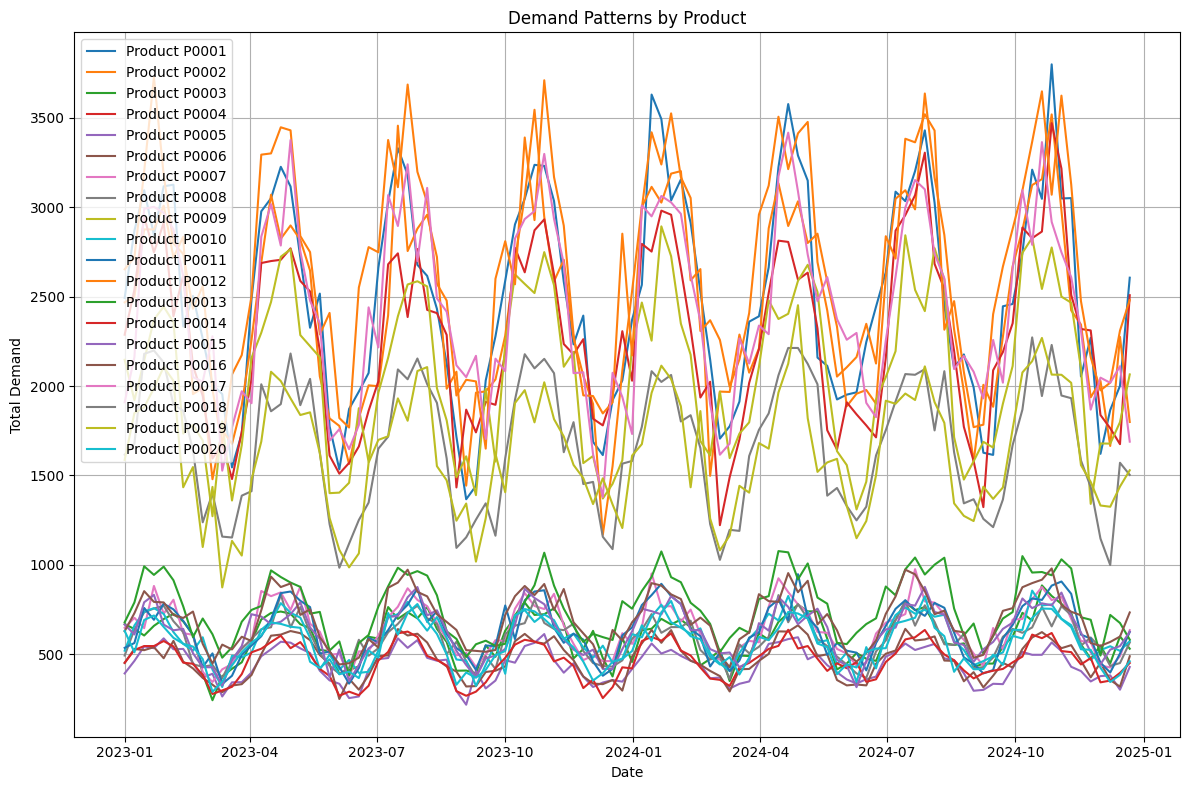

In [29]:
demand_df = pd.read_excel("my_supply_chain_data.xlsx", sheet_name="demand", index_col=0)
product_df = pd.read_excel("my_supply_chain_data.xlsx", sheet_name="products", index_col=0)

product_ids = list(product_df.index)



visualize_demand_patterns(demand_df=demand_df, product_ids=product_ids )

In [30]:
# sum total demand per product
total_demand_per_product = demand_df.groupby('product_id')['demand'].sum()

print("Total Demand per Product:")
print(total_demand_per_product)

Total Demand per Product:
product_id
P0001    260216
P0002    253539
P0003     61804
P0004    237234
P0005     45809
P0006     49026
P0007     66638
P0008     60871
P0009    215356
P0010     61603
P0011     65383
P0012    279416
P0013     79676
P0014     48024
P0015     64441
P0016     72800
P0017    252518
P0018    173362
P0019    169601
P0020     57838
Name: demand, dtype: int64


In [31]:
total_demand = demand_df['demand'].sum()
print(f"Total Demand across all products and facilities: {total_demand}")   

Total Demand across all products and facilities: 2575155


In [32]:
# group by week
total_demand_per_week = demand_df.groupby('date')['demand'].sum()
print("Total Demand per Week:")
print(total_demand_per_week)


Total Demand per Week:
date
2023-01-01    23928
2023-01-08    25604
2023-01-15    29738
2023-01-22    30410
2023-01-29    30314
              ...  
2024-11-24    20971
2024-12-01    19250
2024-12-08    18838
2024-12-15    20964
2024-12-22    22882
Name: demand, Length: 104, dtype: int64


In [33]:
describe = total_demand_per_week.describe()
print("Descriptive Statistics for Weekly Demand:")
print(describe)

Descriptive Statistics for Weekly Demand:
count      104.000000
mean     24761.105769
std       4977.000245
min      16491.000000
25%      20355.500000
50%      23901.000000
75%      29786.750000
max      33012.000000
Name: demand, dtype: float64


In [34]:
# total capacity summed over time periods
total_capacity = facilities_df['production_capacity'].sum()*52*2

total_capacity

np.int64(2575144)

In [35]:
#total_demand
total_demand = demand_df['demand'].sum()

total_demand

np.int64(2575155)